In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

plt.rcParams["figure.figsize"] = (20,10)
sns.set(rc={'figure.figsize':(20,10)})

pd.set_option('display.max_columns', None)
display.max_rows = 10

C:\Users\sithl\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
players = pd.read_csv('project_data\players.csv')
players_salary = pd.read_csv('project_data\players_salary.csv')
teams = pd.read_csv('project_data\\teams.csv')
teams_salary = pd.read_csv('project_data\\teams_salary.csv')
teams_average = pd.read_csv('project_data\\teams_average.csv')
players_average = pd.read_csv('project_data\players_average.csv')

In [3]:
teams_average.drop(index=0, columns='Unnamed: 0', inplace=True)
teams_average.rename(columns={'year_ID': 'year_ID', 'salary_x': 'salary_mean',
                     'salary_x.1': 'salary_std', 'salary_x.2': 'salary_median'}, inplace=True)
teams_average.reset_index(drop=True, inplace=True)
teams_average = teams_average.astype(float)

players_average.drop(index=0, columns='Unnamed: 0', inplace=True)
players_average.rename(columns={'year_ID': 'year_ID', 'salary_x': 'salary_mean',
                       'salary_x.1': 'salary_std', 'salary_x.2': 'salary_median',
                       'aggregated_salary': 'agg_mean', 'aggregated_salary.1': 'agg_std', 'aggregated_salary.2': 'agg_median'}, inplace=True)
players_average.reset_index(drop=True, inplace=True)
players_average = players_average.astype(float)

### Salary Standard Deviation Distributions

Salary Standard Deviation is used to see whether the distribution of how teams pay their players matters towards their success. A high std would suggest a team that is highly paying a few players, and has many on minimal salary. Compared to a lower std where most of the players on the team make the same amount. Additionally, in latter plots I am looking at between 1.2 to 1.6 team salary_plus. Within this range, around half teams make the payoffs (see presentation.ipynb), so it is a good sample to see what differentiates the teams that do and do not.

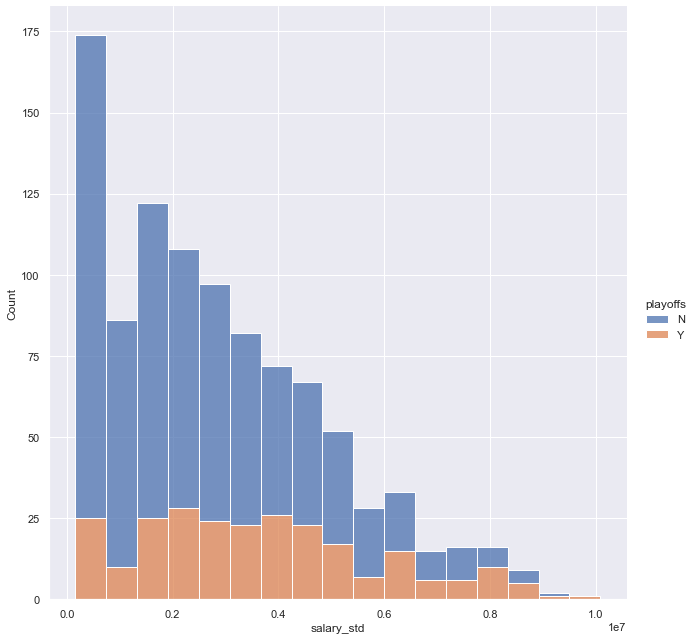

In [4]:
sns.displot(x=teams['salary_std']
            ,hue=teams['playoffs']
            ,multiple='stack'
            #, kind='kde'
            , height = 9
            )

In [5]:
upper_middle_teams = teams[(teams['salary_plus'] > 1.2) & (teams['salary_plus'] < 1.6)]

In [6]:
len(upper_middle_teams)

211

Text(0.5, 1.0, 'Density of Salary_STD for Teams 1.2 < Salary_Plus < 1.6')

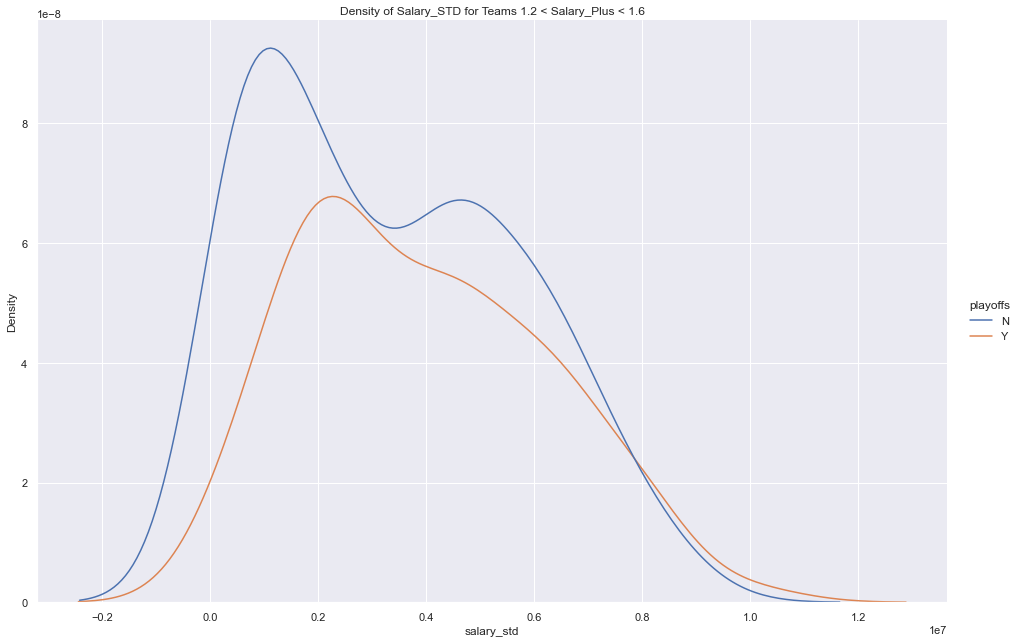

In [7]:
sns.displot(x=upper_middle_teams['salary_std']
             ,hue=upper_middle_teams['playoffs']
             ,multiple='layer'
            , kind='kde'
            ,height = 9
            ,aspect=1.5
            )
plt.title('Density of Salary_STD for Teams 1.2 < Salary_Plus < 1.6')

Text(0.5, 1.0, 'Density of Salary_STD for Playoff Teams 1.2 < Salary_Plus < 1.6')

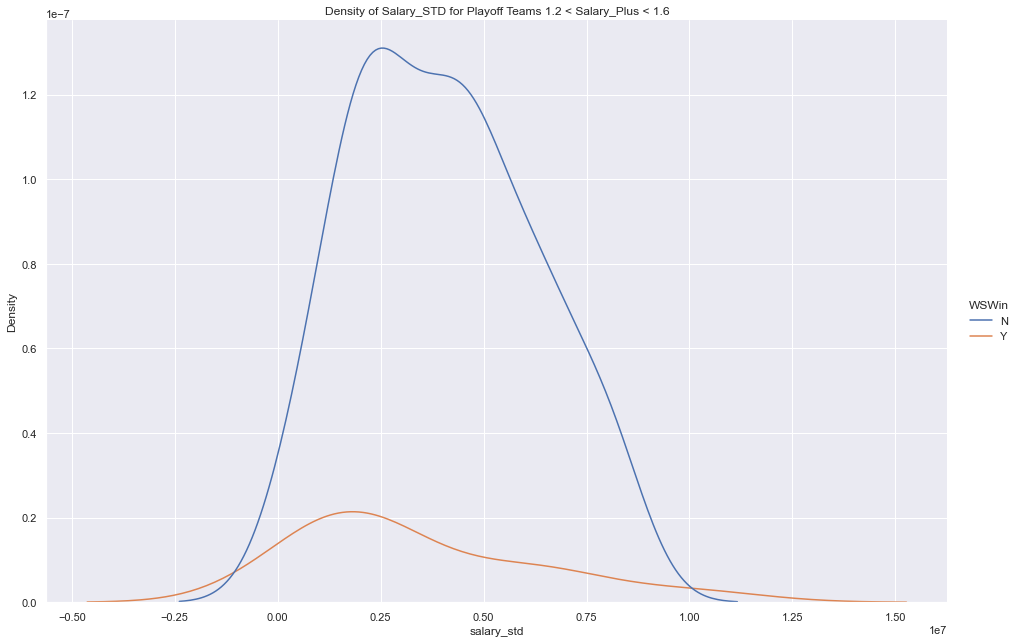

In [8]:
sns.displot(x = upper_middle_teams[upper_middle_teams['playoffs'] == 'Y']['salary_std']
            ,hue=teams['WSWin']
            ,kind='kde'
             ,height = 9
            ,aspect=1.5
            )

plt.title('Density of Salary_STD for Playoff Teams 1.2 < Salary_Plus < 1.6')

### Individual Team Salary Distributions

Showing the top 15 salaried players from each team and year, splitting between playoff teams and not. These plots are narratively strong, showing the difference in salary distributions between playoff and non-playoff teams for the same years, as well as showing what team won the World Series that year. 

a:\Users\sithl\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


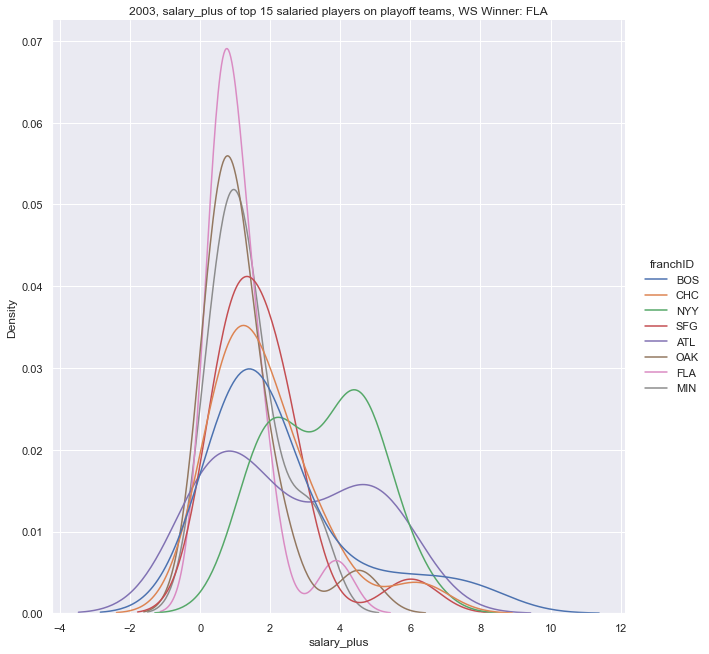

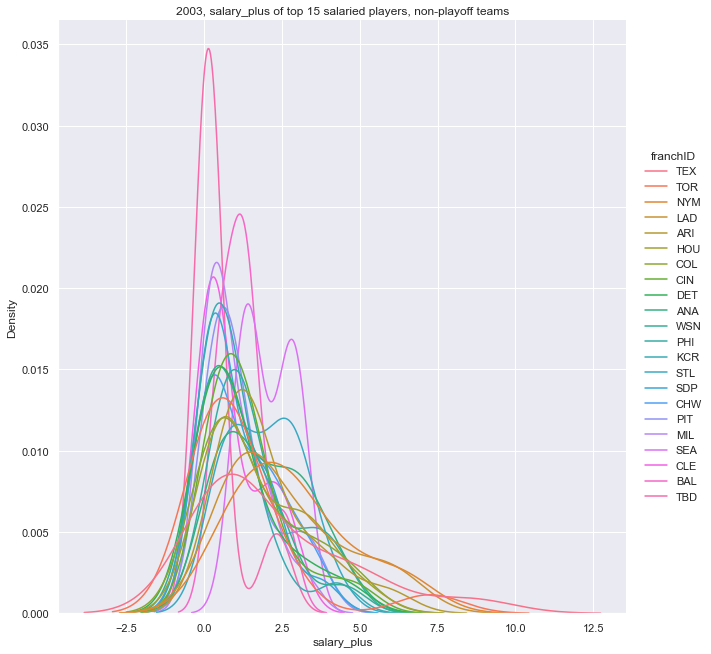

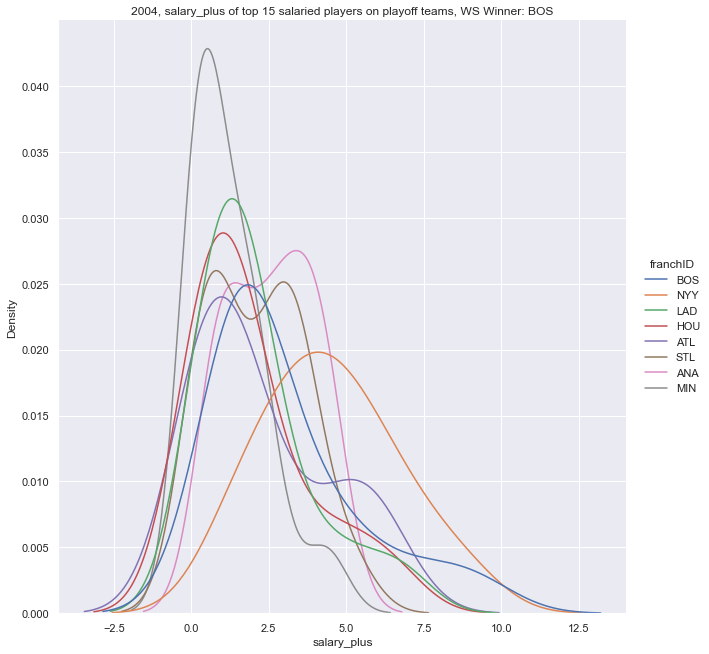

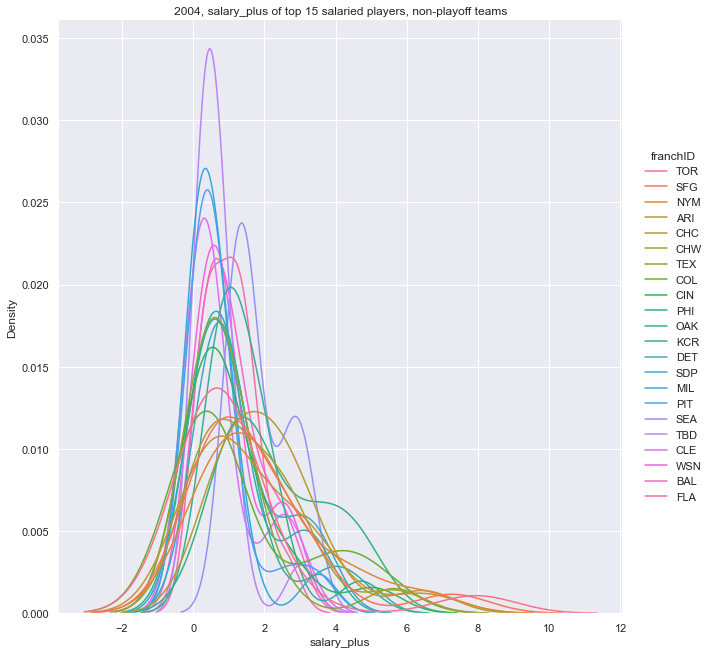

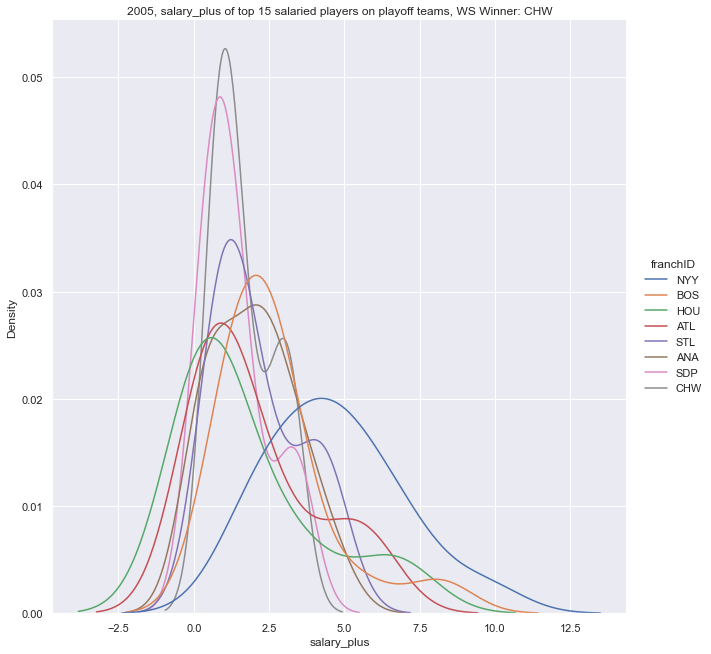

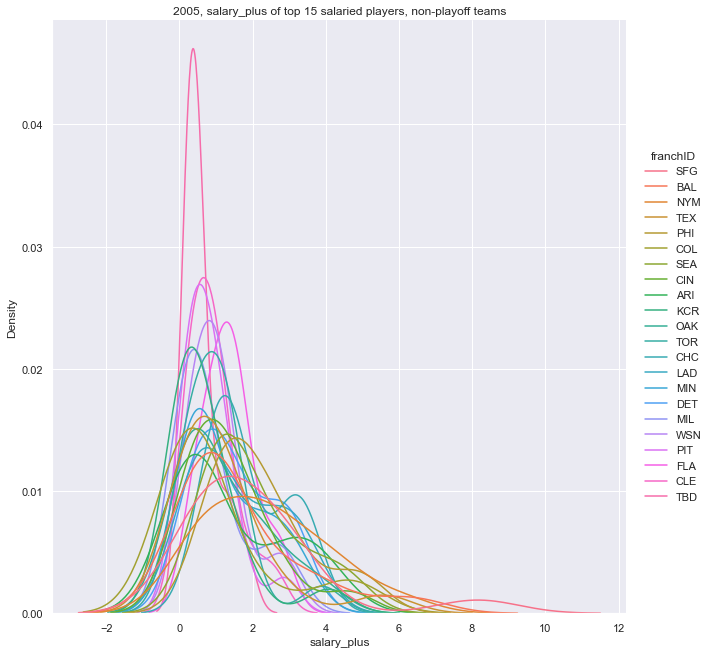

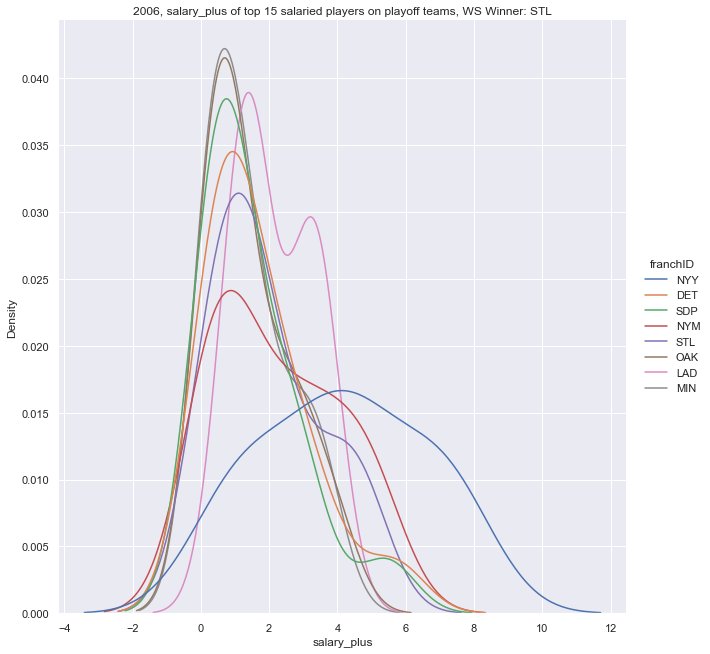

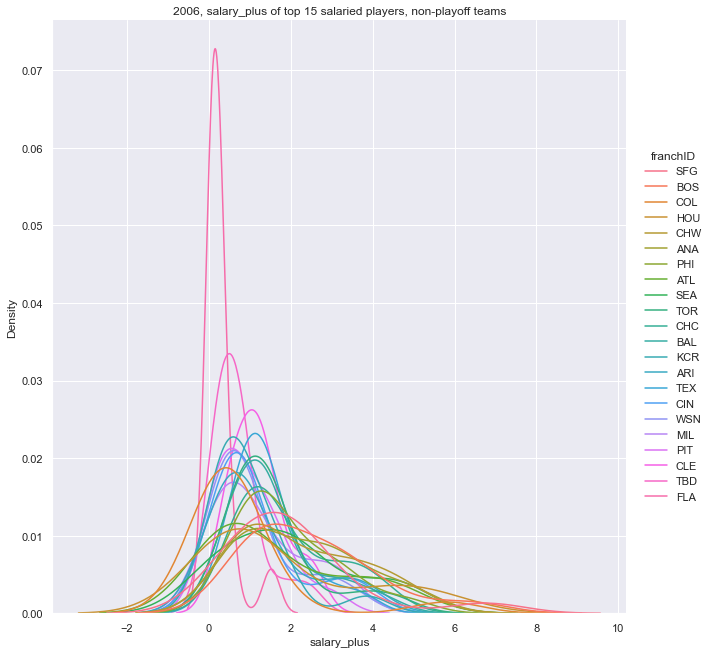

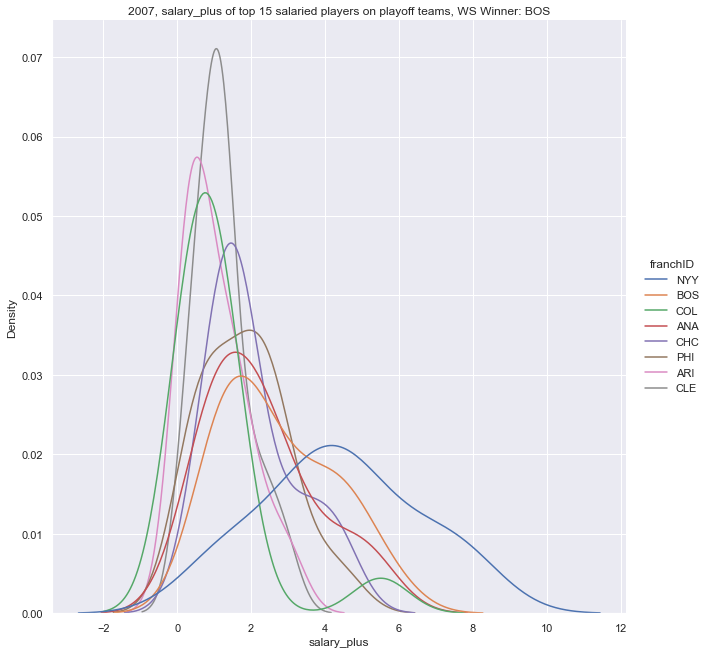

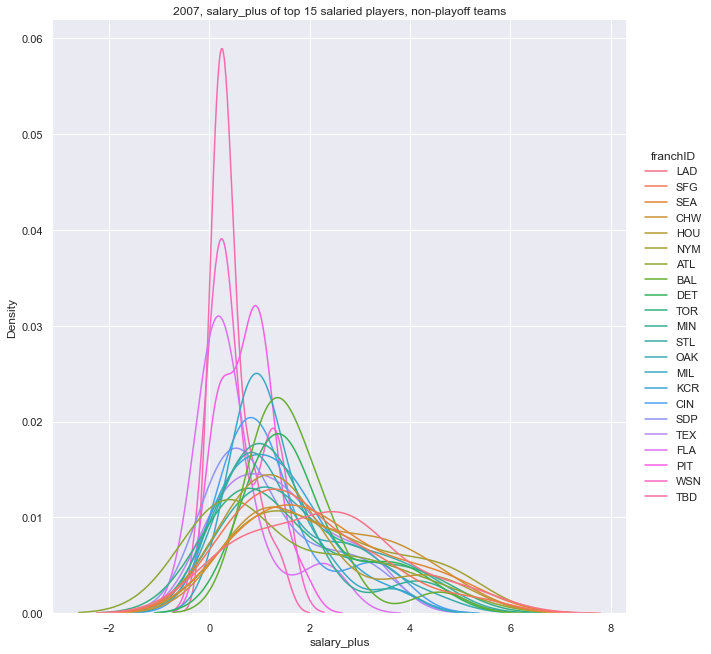

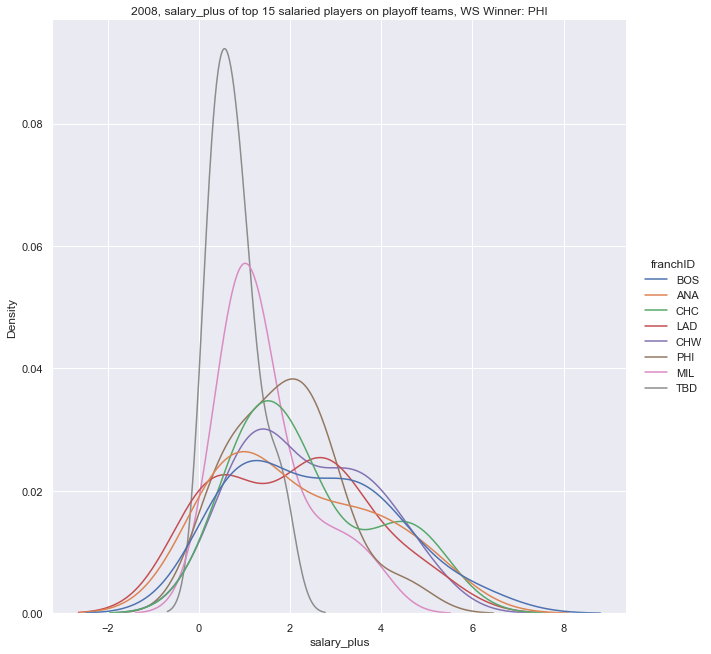

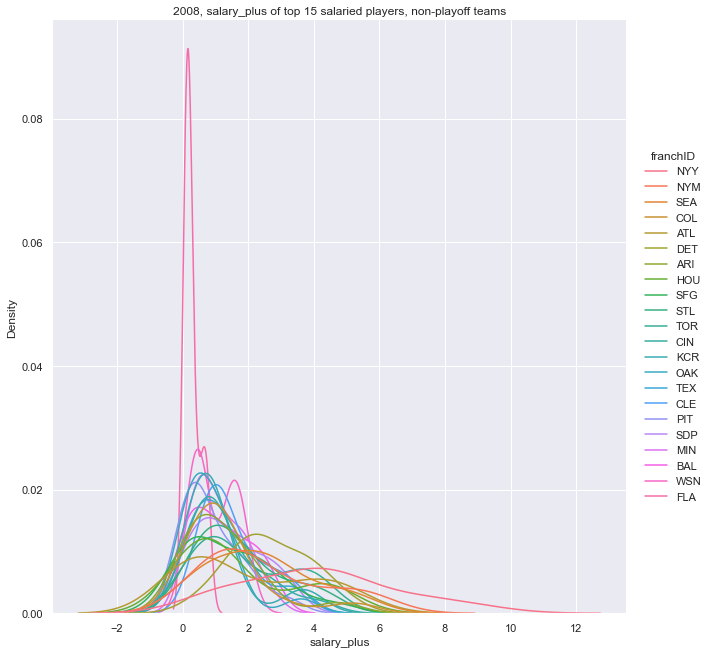

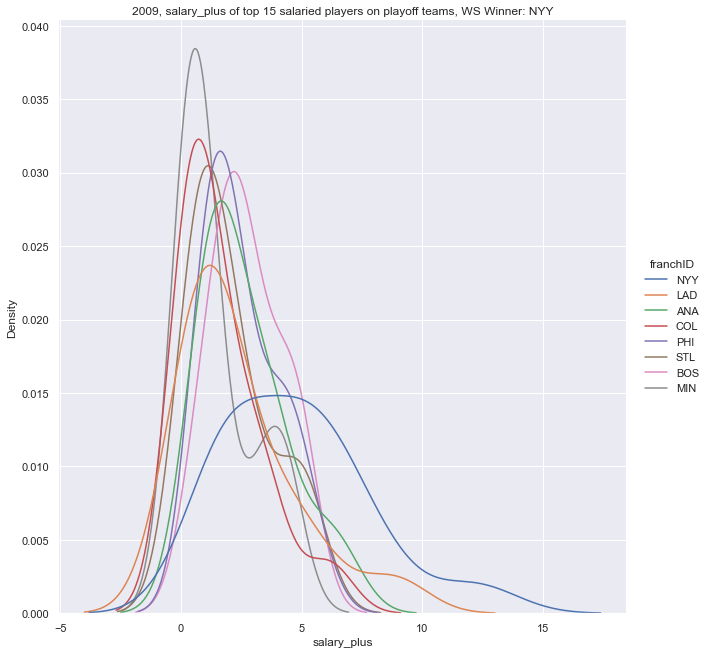

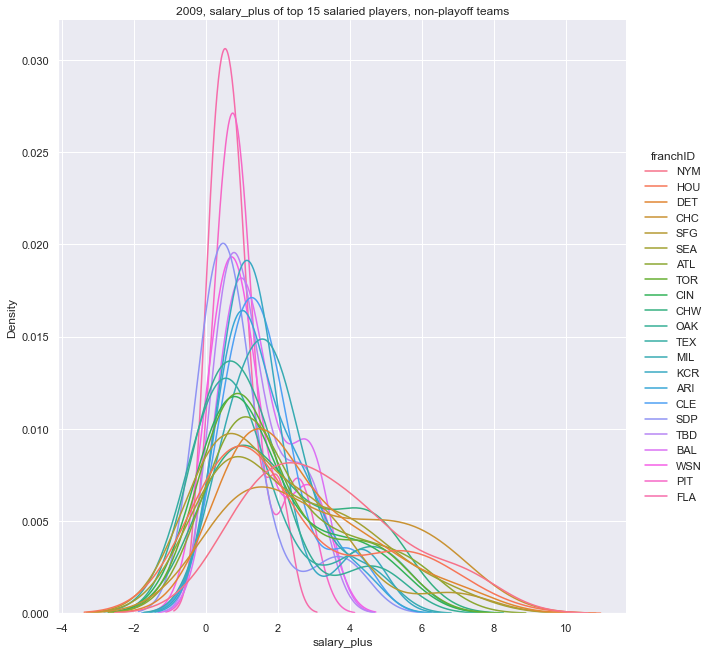

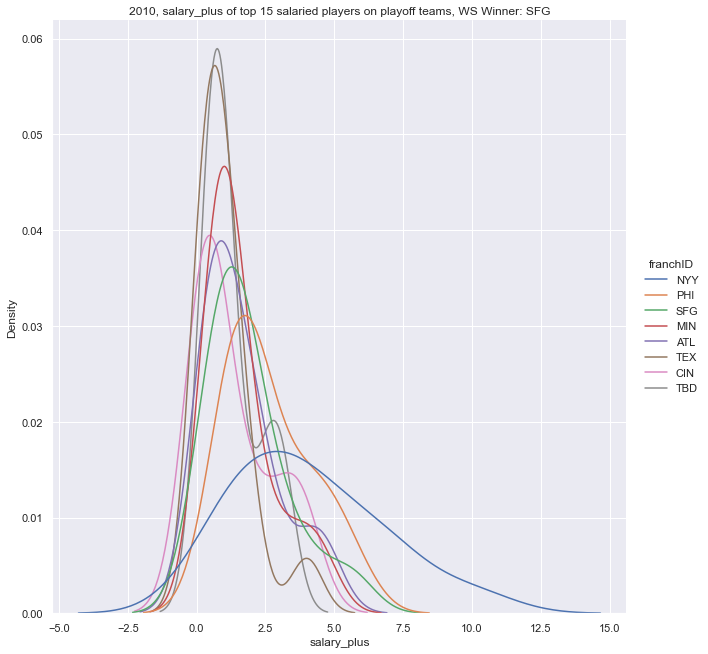

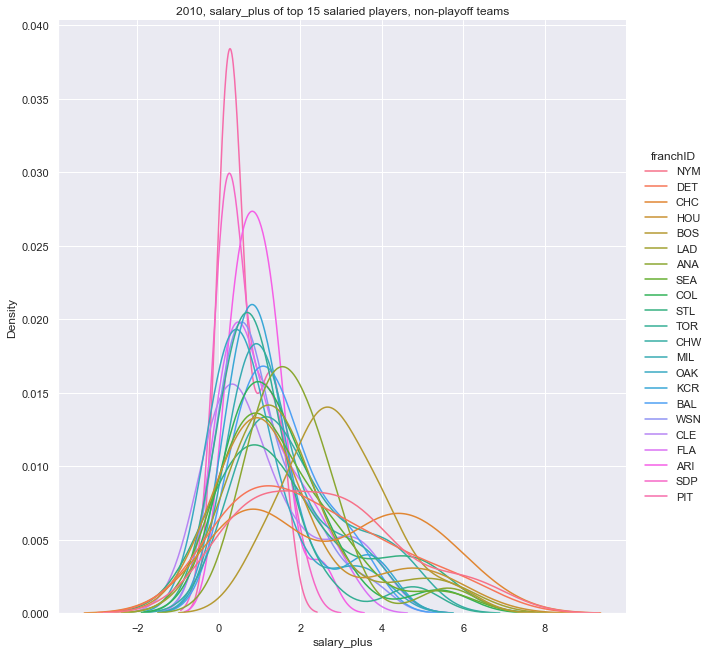

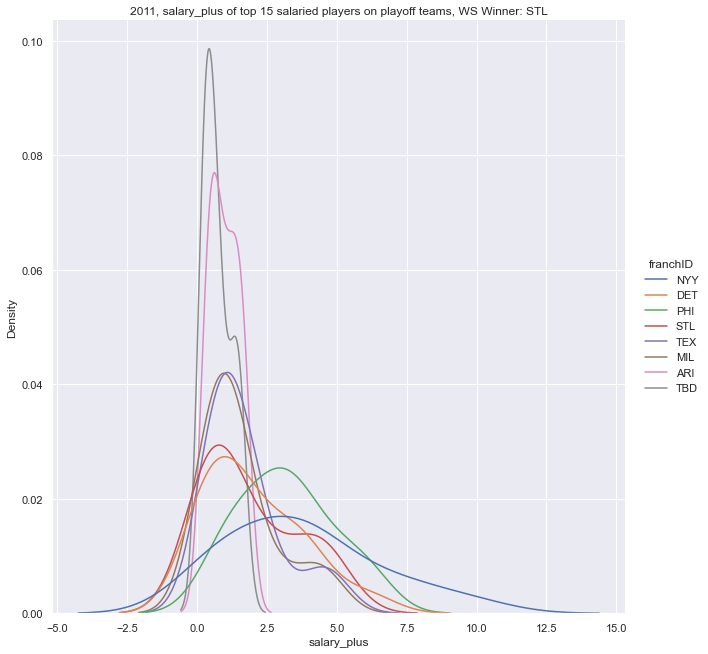

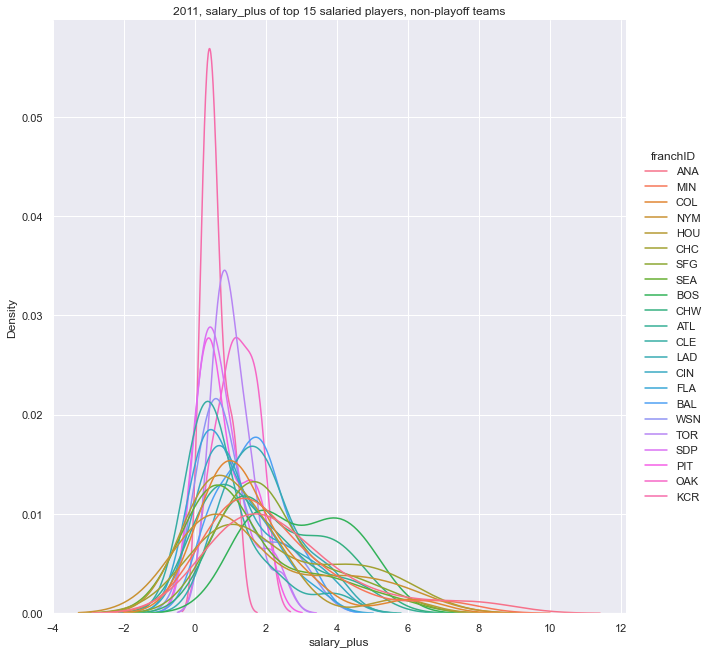

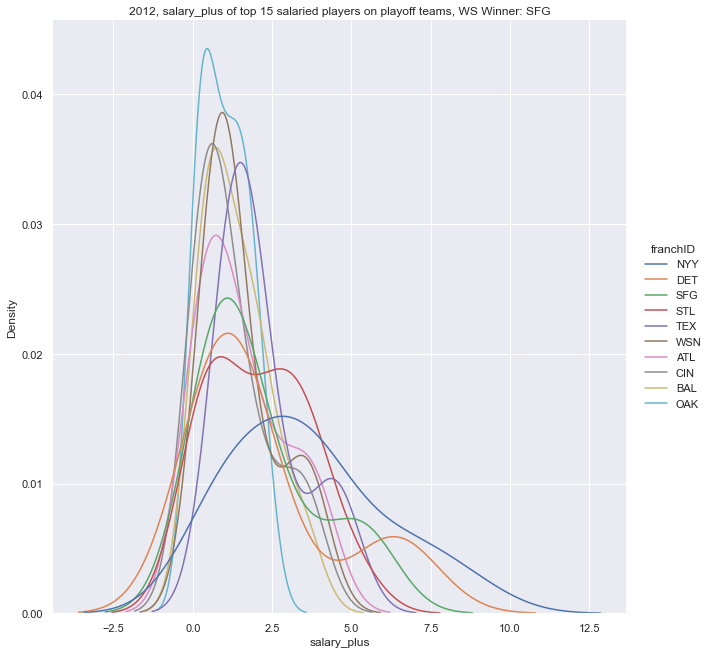

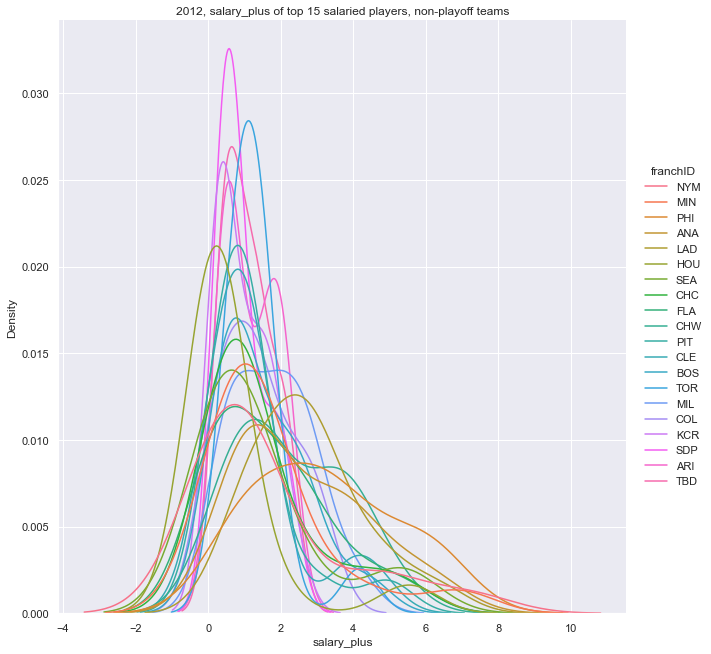

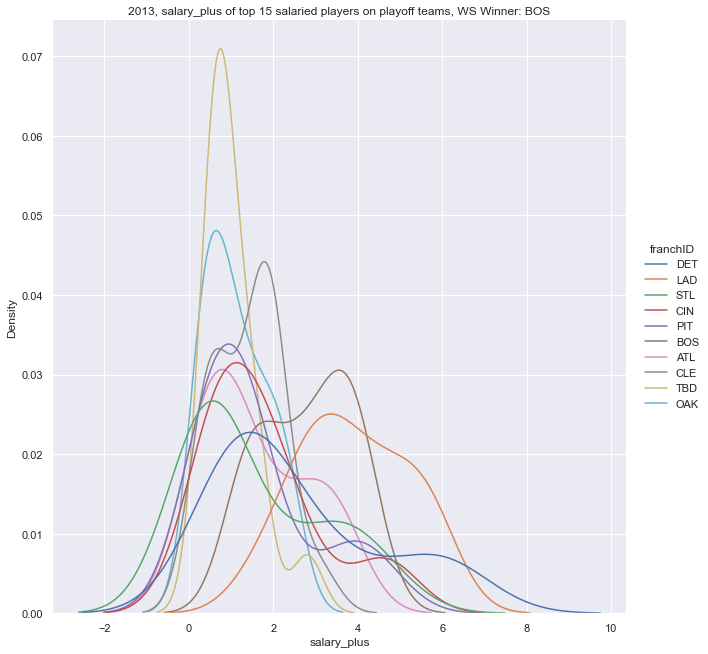

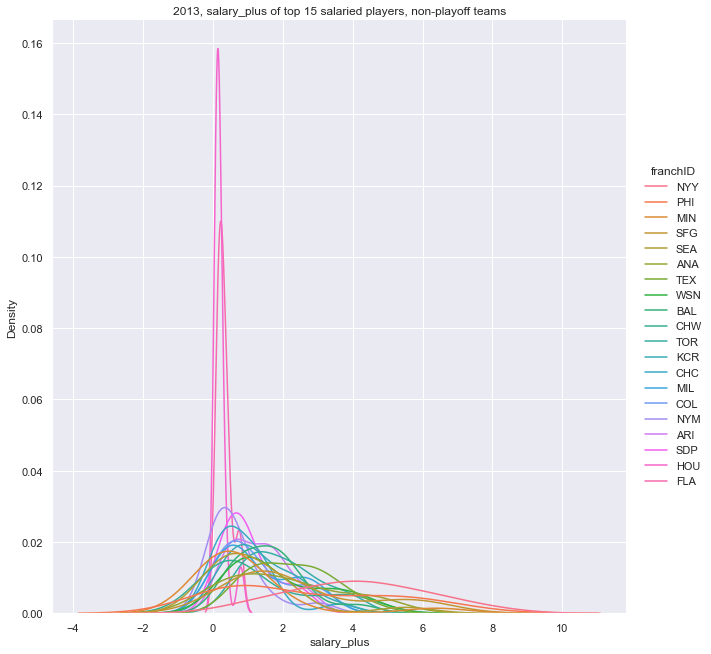

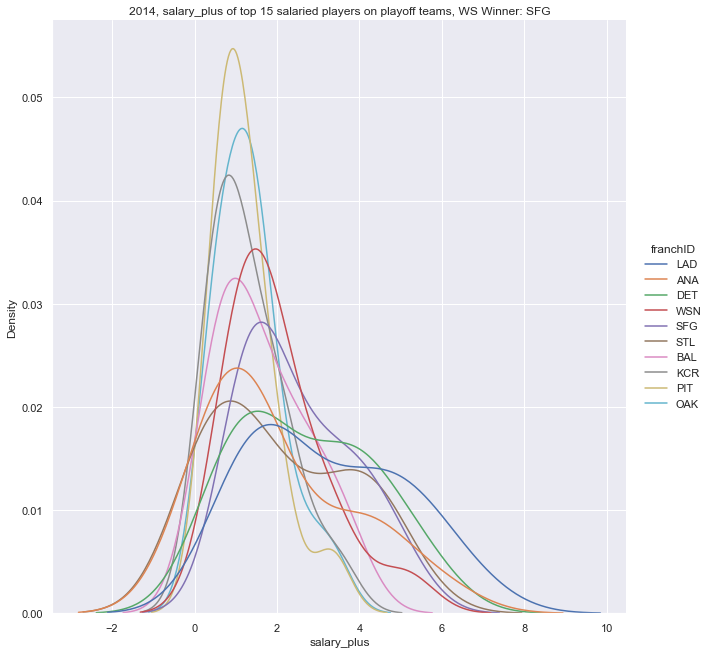

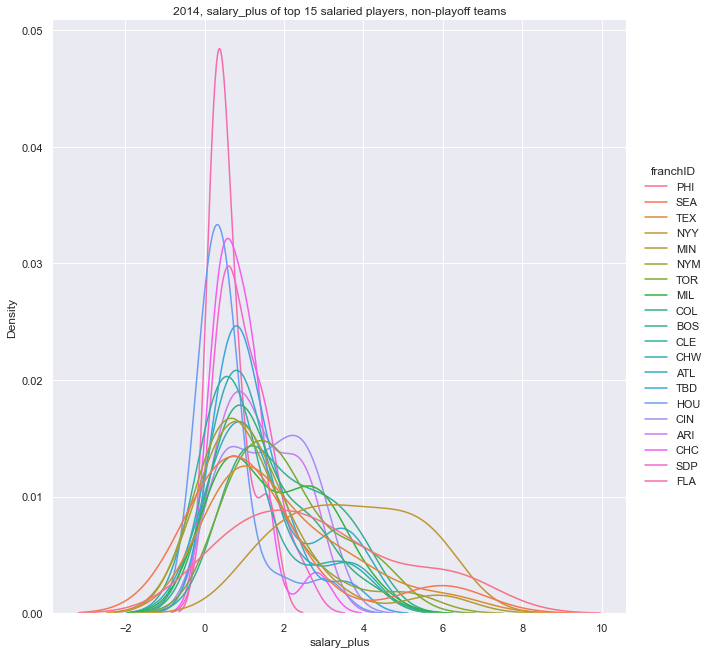

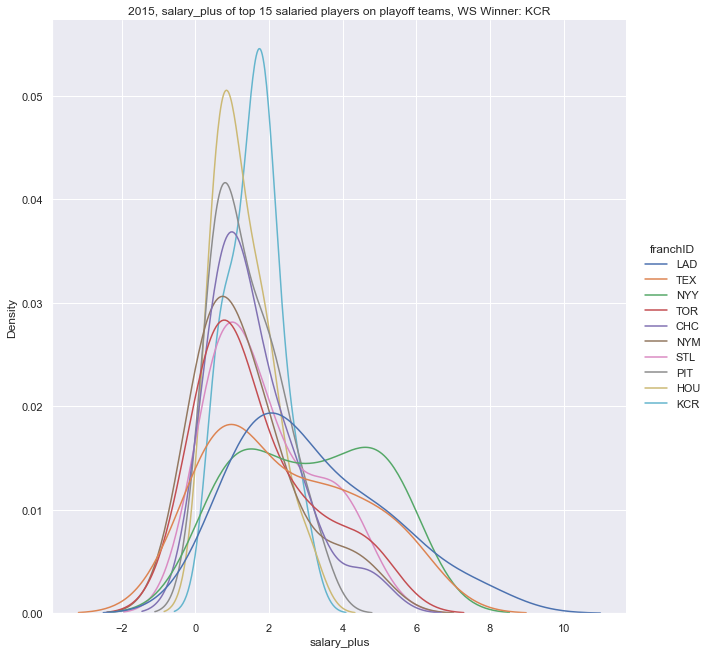

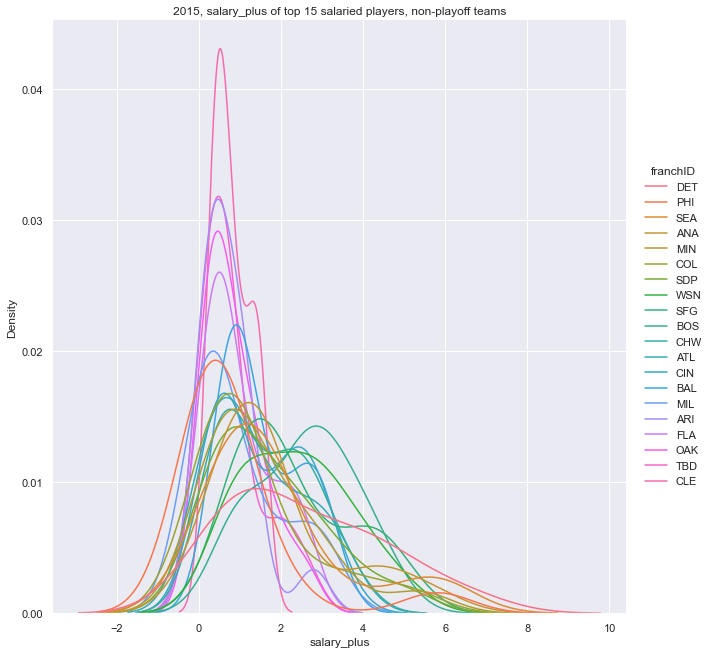

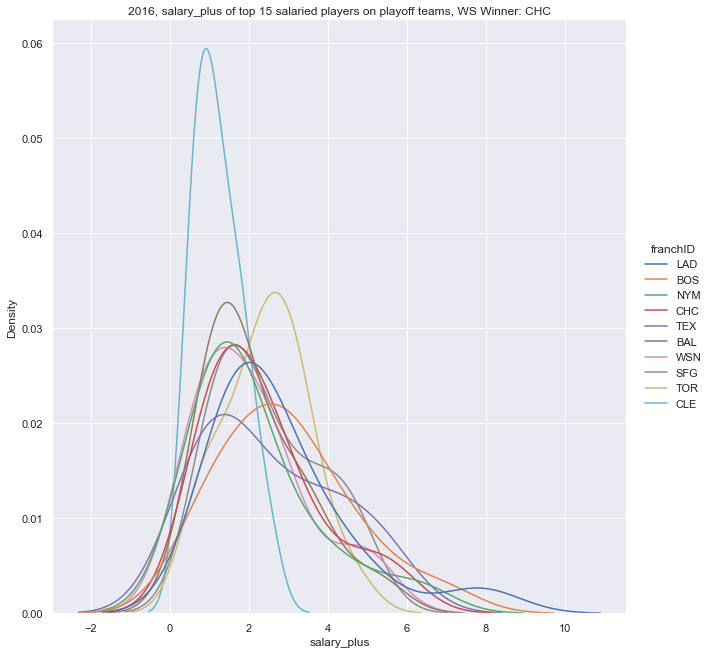

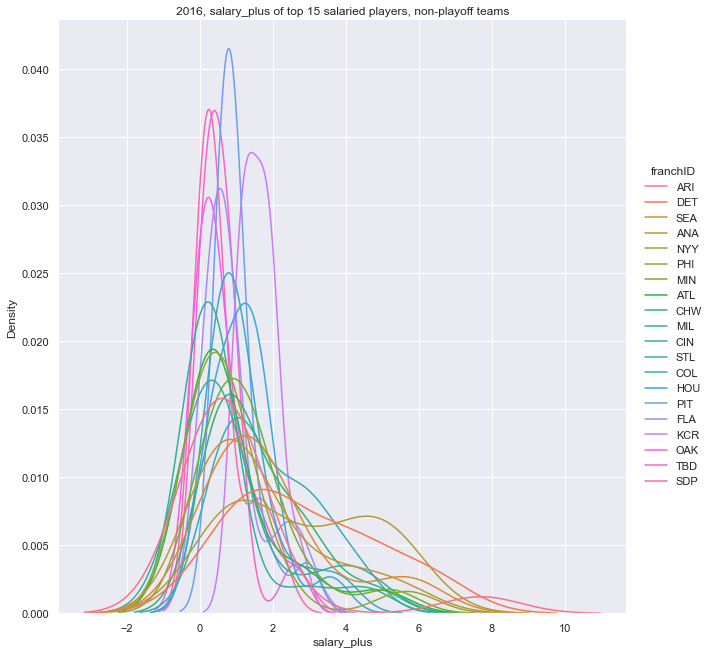

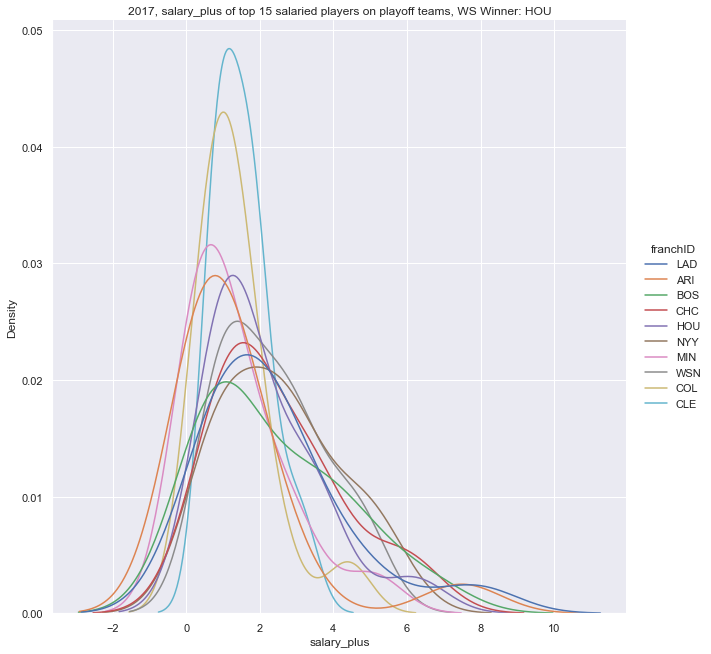

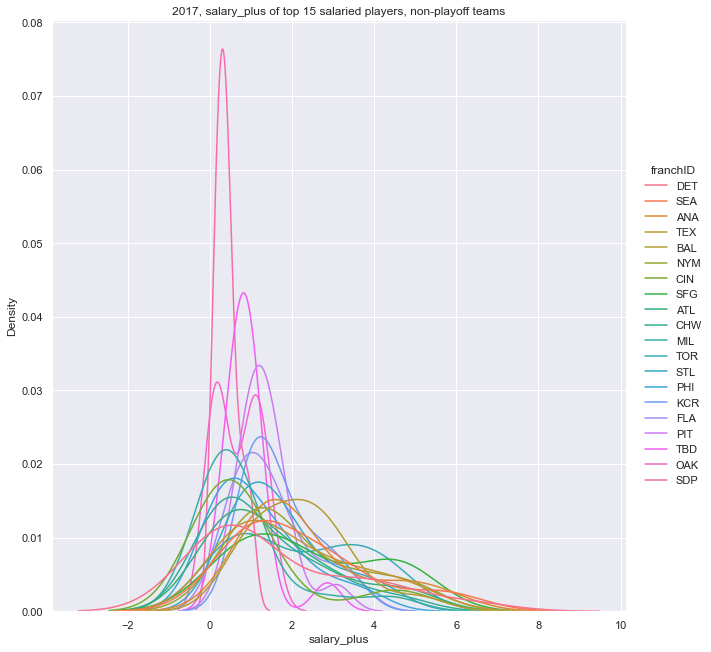

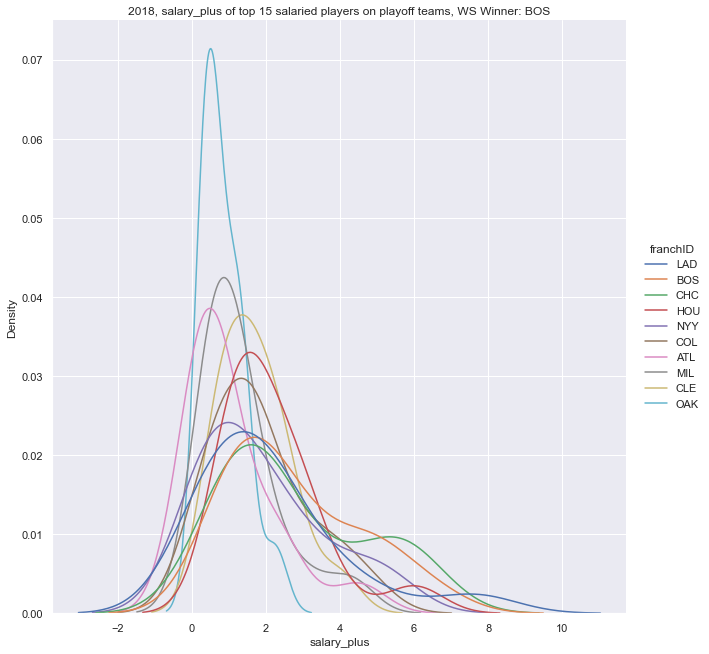

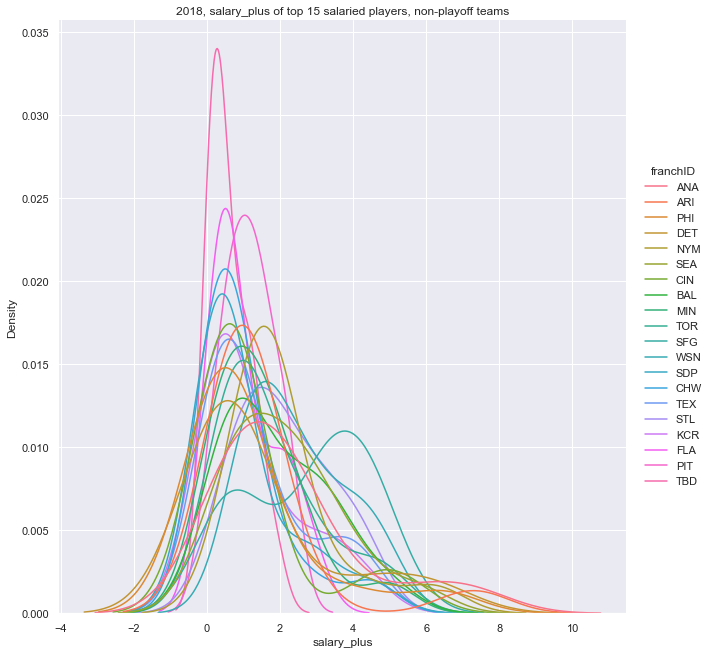

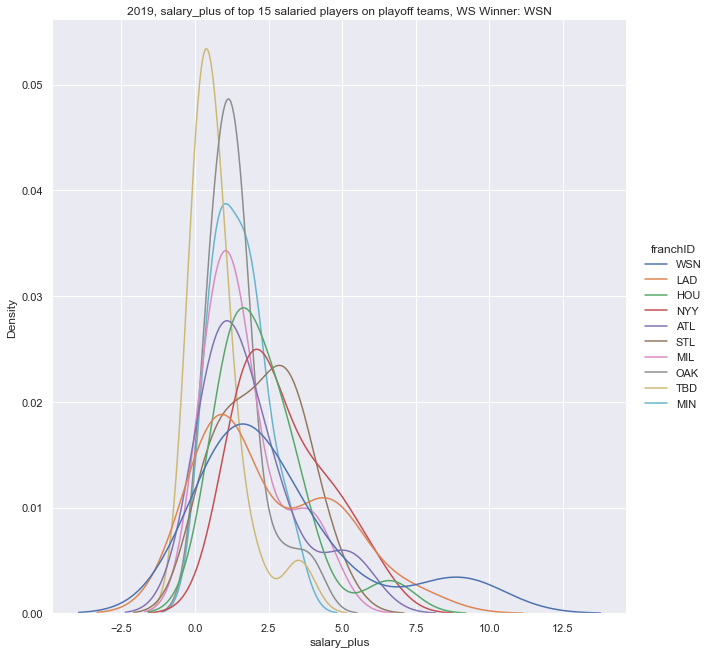

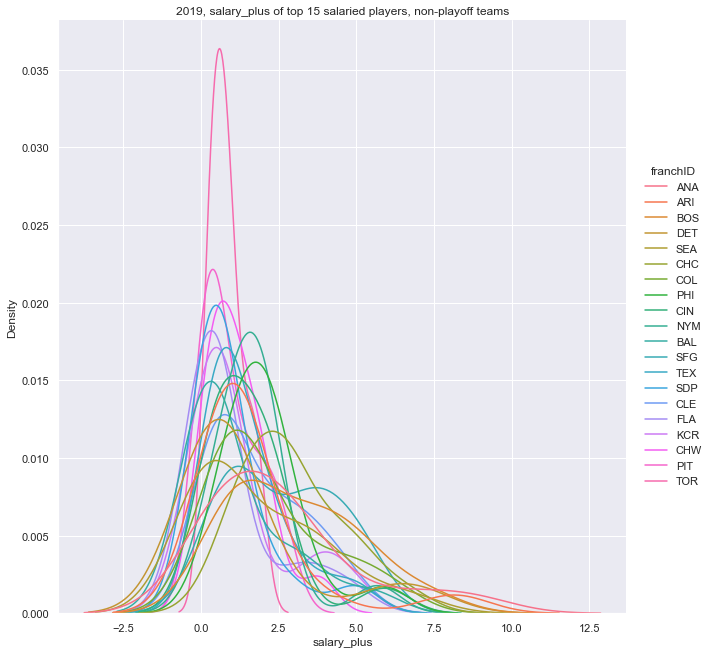

In [9]:
players_salary_sort = players.sort_values('salary_plus',ascending=False).groupby(['year_ID','franchID']).head(15)
for year in range(2003,2020):
    

    players_use = players_salary_sort[(players_salary_sort['playoffs'] == 'Y') & (players_salary_sort['year_ID'] == year)]
    WSWinner = teams[(teams['year_ID'] == year) & (teams['WSWin'] == 'Y')].reset_index()['franchID'][0]

    sns.displot(x=players_use['salary_plus']
                ,hue=players_use['franchID']
                ,kind='kde'
                ,height=9
                ).set(title=f'{year}, salary_plus of top 15 salaried players on playoff teams, WS Winner: {WSWinner}')
    
    players_use2 = players_salary_sort[(players_salary_sort['playoffs'] == 'N') & (players_salary_sort['year_ID'] == year)]

    sns.displot(x=players_use2['salary_plus']
                ,hue=players_use2['franchID']
                ,kind='kde'
                ,height=9
                ).set(title=f'{year}, salary_plus of top 15 salaried players, non-playoff teams')
